In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("sales.csv")
df.info()
df.describe()

features = pd.read_csv("features.csv").drop(columns=['IsHoliday'])
features.info()
features.describe()

stores = pd.read_csv("stores.csv")
stores.info()
stores.describe()

df = df.merge(stores, how='left').merge(features, how='left')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 703.9+ KB
<class 'pandas.core.frame.DataFrame'>
Ra

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


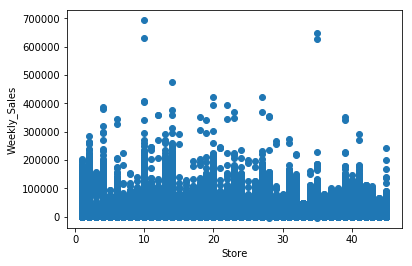

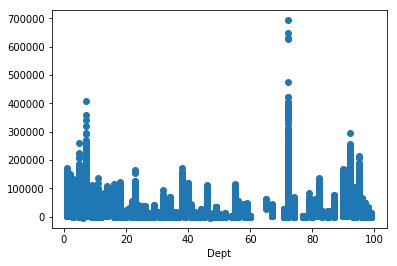

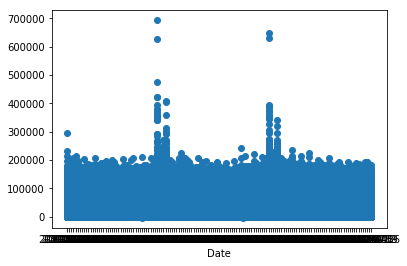

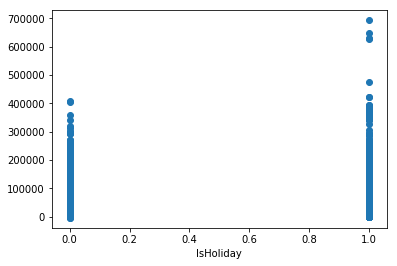

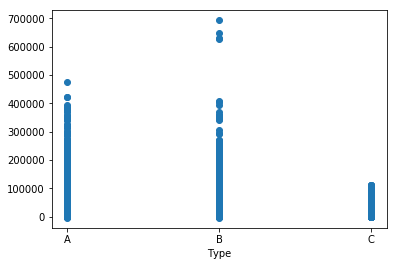

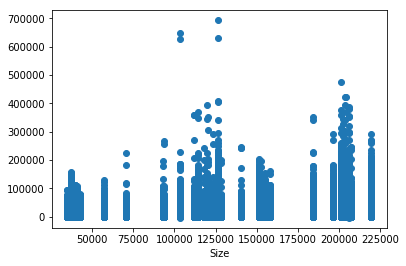

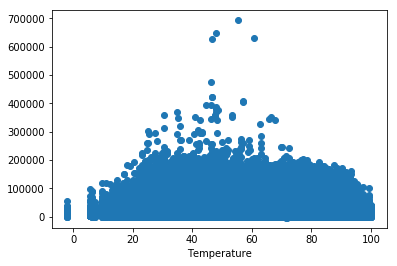

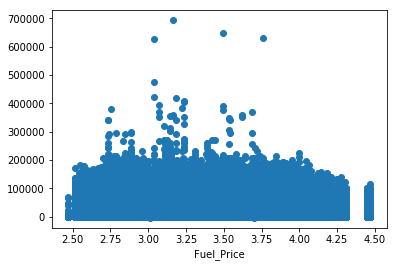

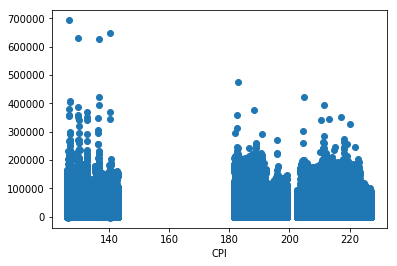

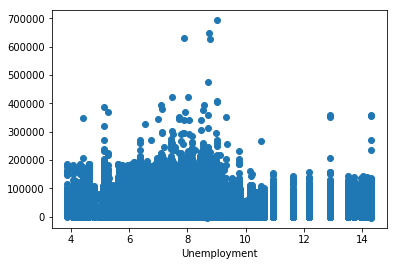

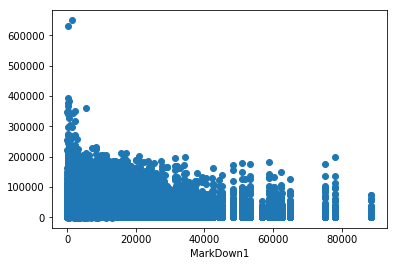

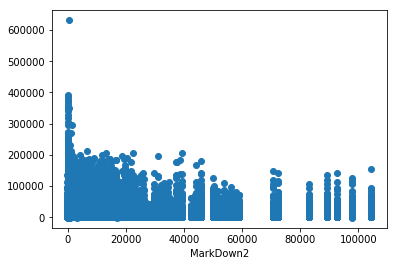

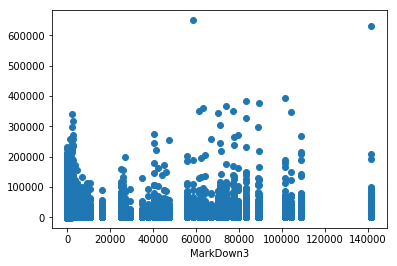

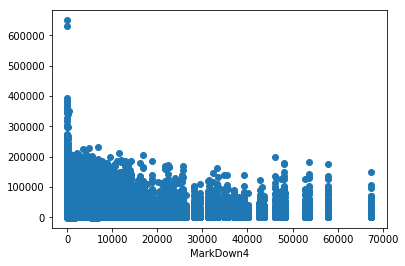

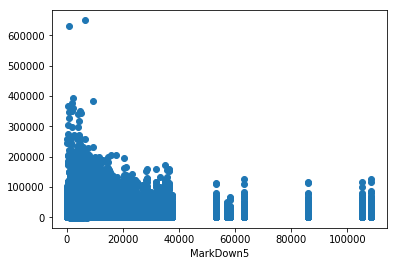

<Figure size 432x288 with 0 Axes>

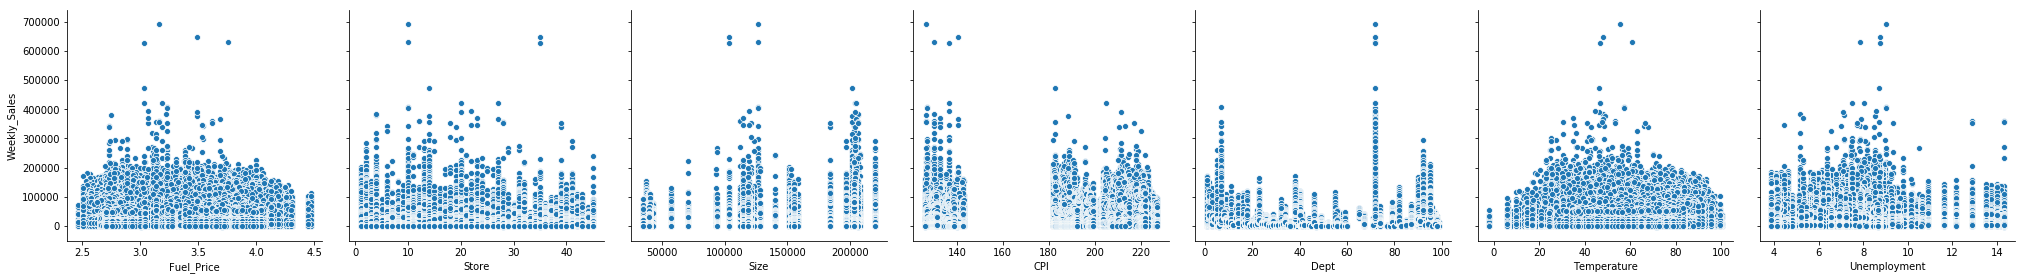

<Figure size 432x288 with 0 Axes>

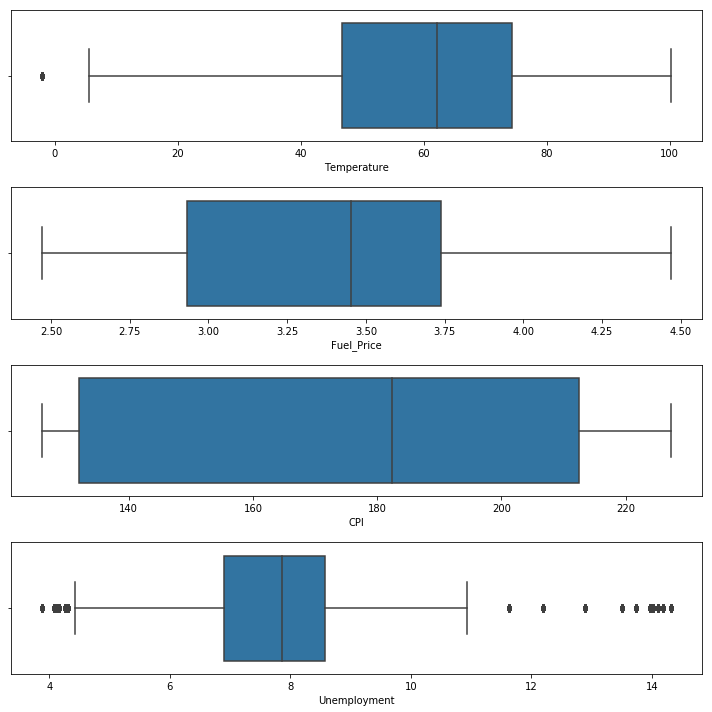

<Figure size 432x288 with 0 Axes>

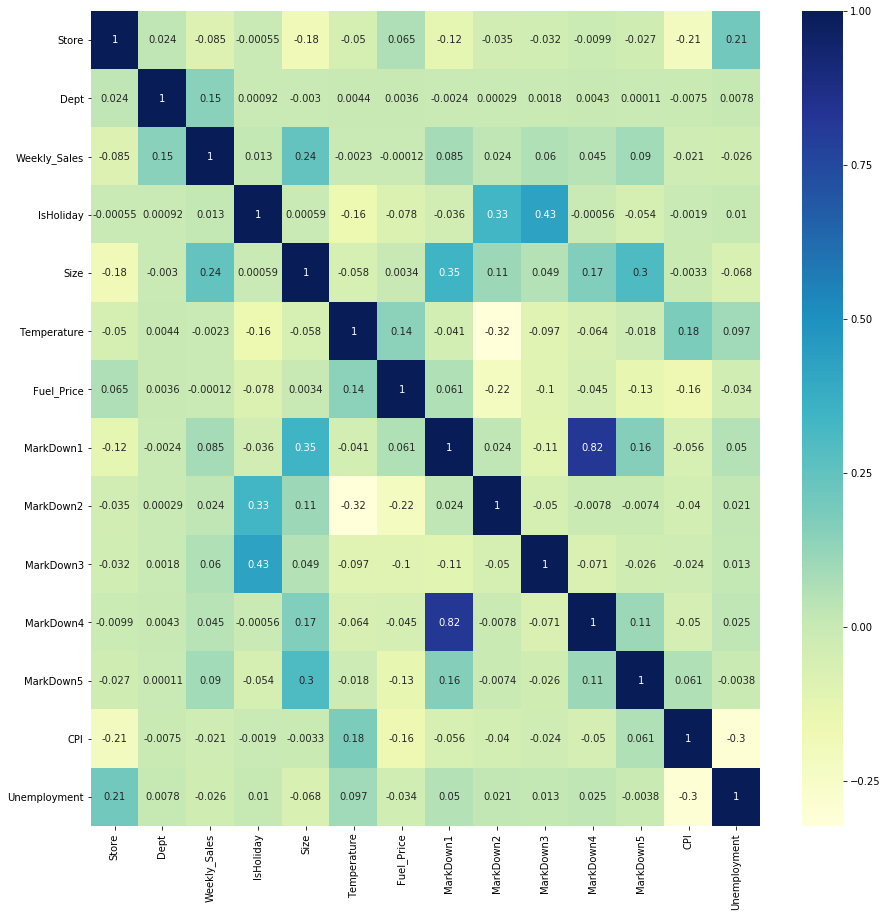

Relevant features


Store           0.085195
Dept            0.148032
Weekly_Sales    1.000000
Size            0.243828
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown5       0.090362
Name: Weekly_Sales, dtype: float64

In [3]:
plt.figure()
plt.ylabel('Weekly_Sales')

plt.scatter(df['Store'] , df['Weekly_Sales'])
plt.xlabel('Store')
plt.show()

plt.scatter(df['Dept'] , df['Weekly_Sales'])
plt.xlabel('Dept')
plt.show()

plt.scatter(df['Date'] , df['Weekly_Sales'])
plt.xlabel('Date')
plt.show()

plt.scatter(df['IsHoliday'] , df['Weekly_Sales'])
plt.xlabel('IsHoliday')
plt.show()

plt.scatter(df['Type'] , df['Weekly_Sales'])
plt.xlabel('Type')
plt.show()

plt.scatter(df['Size'] , df['Weekly_Sales'])
plt.xlabel('Size')
plt.show()

plt.scatter(df['Temperature'] , df['Weekly_Sales'])
plt.xlabel('Temperature')
plt.show()

plt.scatter(df['Fuel_Price'] , df['Weekly_Sales'])
plt.xlabel('Fuel_Price')
plt.show()

plt.scatter(df['CPI'] , df['Weekly_Sales'])
plt.xlabel('CPI')
plt.show()

plt.scatter(df['Unemployment'] , df['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.show()

plt.scatter(df['MarkDown1'] , df['Weekly_Sales'])
plt.xlabel('MarkDown1')
plt.show()

plt.scatter(df['MarkDown2'] , df['Weekly_Sales'])
plt.xlabel('MarkDown2')
plt.show()

plt.scatter(df['MarkDown3'] , df['Weekly_Sales'])
plt.xlabel('MarkDown3')
plt.show()

plt.scatter(df['MarkDown4'] , df['Weekly_Sales'])
plt.xlabel('MarkDown4')
plt.show()

plt.scatter(df['MarkDown5'] , df['Weekly_Sales'])
plt.xlabel('MarkDown5')
plt.show()

plt.clf()
sns.pairplot(df, x_vars=['Fuel_Price', 'Store', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'], y_vars='Weekly_Sales', height=4, aspect=1, kind='scatter')
plt.show()

plt.clf()
fig, axs = plt.subplots(4, figsize = (10,10))
plt1 = sns.boxplot(df['Temperature'], ax = axs[0])
plt2 = sns.boxplot(df['Fuel_Price'], ax = axs[1])
plt3 = sns.boxplot(df['CPI'], ax = axs[2])
plt4 = sns.boxplot(df['Unemployment'], ax = axs[3])
plt.tight_layout()
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

cor = df.corr()
cor_target = abs(cor["Weekly_Sales"])

relevant_features = cor_target[cor_target>0.05]
print("Relevant features")
relevant_features

In [7]:
df.info()

df.isnull().sum()
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

df = pd.get_dummies(df, columns=["Type"])

df['Month'] = pd.to_datetime(df['Date']).dt.month
df.drop(columns="Date", inplace=True)

df["IsHoliday"] *= 1

df = df[df['Temperature']>0]

'''
Relevant features
Store           0.085195
Dept            0.148032
Weekly_Sales    1.000000
Size            0.243828
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown5       0.090362
'''
df.drop(columns=['CPI', 'Fuel_Price', 'Unemployment', 'MarkDown2', 'MarkDown4', 'IsHoliday', 'Temperature', 'Month', 'Type_A', 'Type_B', 'Type_C'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421501 entries, 0 to 421569
Data columns (total 7 columns):
Store           421501 non-null int64
Dept            421501 non-null int64
W

In [8]:
x = df.drop(columns="Weekly_Sales")
y = df['Weekly_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=21)

In [9]:
# Linear Regression

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
new_labels = model.predict(X_test)
print("Linear Regression Performance")
print(model.score(X_test, Y_test)*100)

# K-Neighbor Regression

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, Y_train)
new_labels = model.predict(X_test)
print("KNeighbors Regressor Performance")
print(model.score(X_test, Y_test)*100)

# Random Forest

model = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
model.fit(X_train, Y_train)
new_labels = model.predict(X_test)
print("Random Forest Performance")
print(model.score(X_test, Y_test)*100)

Linear Regression Performance
8.732673494258158
KNeighbors Regressor Performance
63.00447683851651


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest Performance
88.4632494082122


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
